### Analisis de los datos del Raspberry

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from datetime import datetime

Se tomaron datos de Humedad, Presión y Temperatura del 4 al 30 de octubre en donde hay faltantes del 22 al 25 de octubre por errores al conectar el Raspberry.
Con los datos se sacaron el gráfico de Temperatura, Humedad y presión contra el tiempo, y los diagramas individuales de cada medida. 

### Código que se uso en Raspberry para la toma de datos
```python
While 1:  
namefile=datetime.now().strftime("%Y-%m-%d")+".csv"  
    if not os.path.exist("/home/computo/Desktop/Datos_SenseHat/"+namefile):  
    f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")  
         f.write("Datetime,Humedad, Temperatura,Presion\r\n")  
         f.close()  
    else:  
        d=open(/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")  
        d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))  
        humidity=sense.get_humidity() 
        temp=sense.get_temperature()  
        pressure=sense.get_pressure()  
        d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidity,temp,pressure))  
        d.close()  
        print("OK")  
        message="T: " + str(temp)+" P: " + str(pressure)+"H: "+str(humidity)  
        sense.show_message(message,scroll_speed=0.10)  
        time.sleep(1800)
```

In [62]:
listfile = glob.glob("2023*.csv")
listfile.sort()

In [63]:
listfile

['2023-10-04.csv',
 '2023-10-05.csv',
 '2023-10-06.csv',
 '2023-10-07.csv',
 '2023-10-08.csv',
 '2023-10-09.csv',
 '2023-10-10.csv',
 '2023-10-11.csv',
 '2023-10-12.csv',
 '2023-10-13.csv',
 '2023-10-14.csv',
 '2023-10-15.csv',
 '2023-10-16.csv',
 '2023-10-17.csv',
 '2023-10-18.csv',
 '2023-10-19.csv',
 '2023-10-20.csv',
 '2023-10-21.csv',
 '2023-10-26.csv',
 '2023-10-27.csv',
 '2023-10-28.csv',
 '2023-10-29.csv',
 '2023-10-30.csv']

In [64]:
data=[]
for files in listfile:
    data.append (pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)

In [65]:
tiempo=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S")
datafull=datafull.drop(["Datetime"], axis=1)
datafull.insert(0,"Tiempo", tiempo, True)
datafull=datafull.sort_values(by=["Tiempo"], ignore_index=True)

In [66]:
datafull["Presion"].replace(0, np.nan, inplace=True)

In [67]:
datafull["Presion"].interpolate(method="polynomial",order=2,inplace=True)

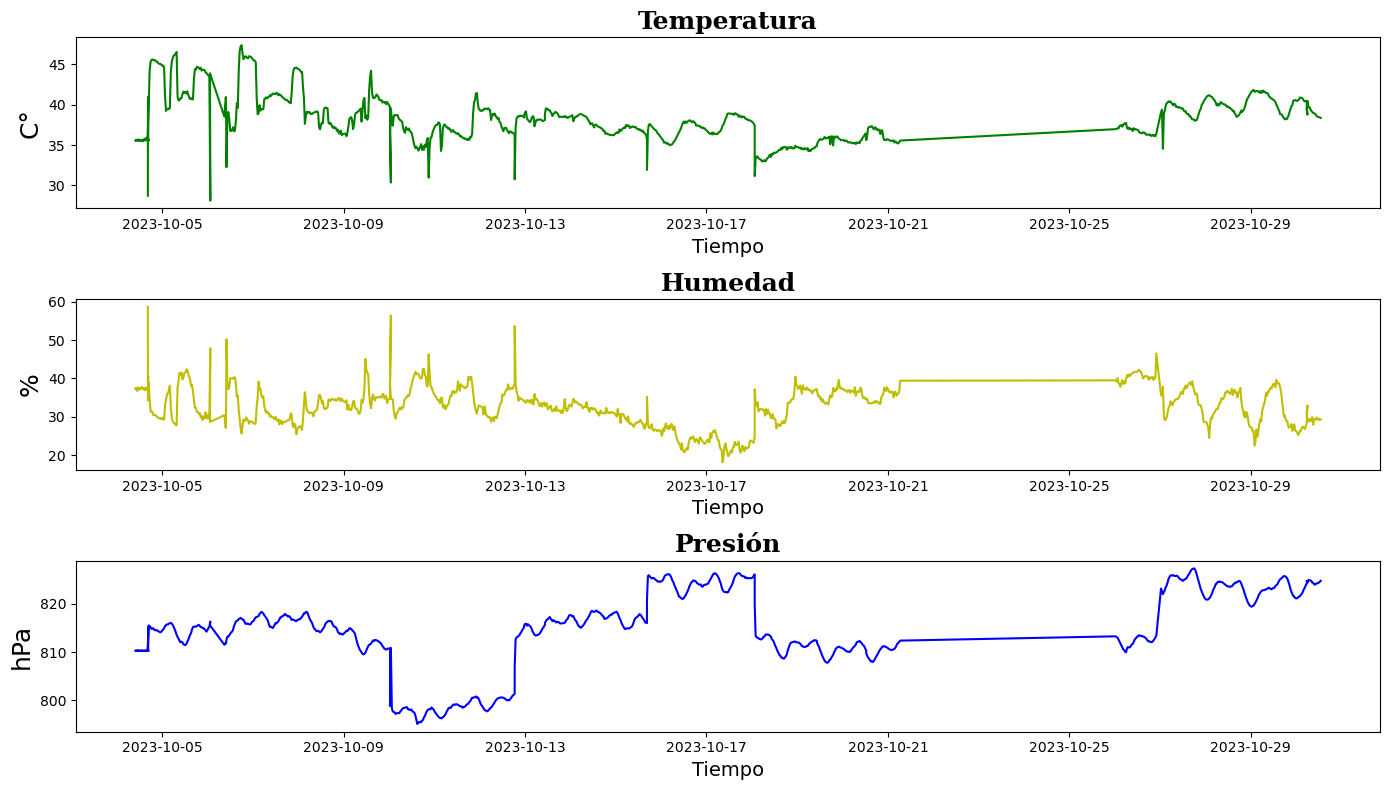

In [68]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,8))
ax1.set_title("Temperatura",fontsize=18,fontweight="bold",fontfamily="serif")
ax1.set_xlabel("Tiempo",fontsize=14)
ax1.set_ylabel("C°",fontsize=18)
ax1.plot(tiempo, datafull[" Temperatura"], label="Temperatura", color="g")

ax2.set_title("Humedad",fontsize=18,fontweight="bold",fontfamily="serif")
ax2.set_xlabel("Tiempo",fontsize=14)
ax2.set_ylabel("%",fontsize=18)
ax2.plot(tiempo, datafull["Humedad"], label="Humedad", color="y")

ax3.set_title("Presión",fontsize=18,fontweight="bold",fontfamily="serif")
ax3.set_xlabel("Tiempo",fontsize=14)
ax3.set_ylabel("hPa",fontsize=18)
ax3.plot(tiempo, datafull["Presion"], label="Presion", color="b")

fig.tight_layout()

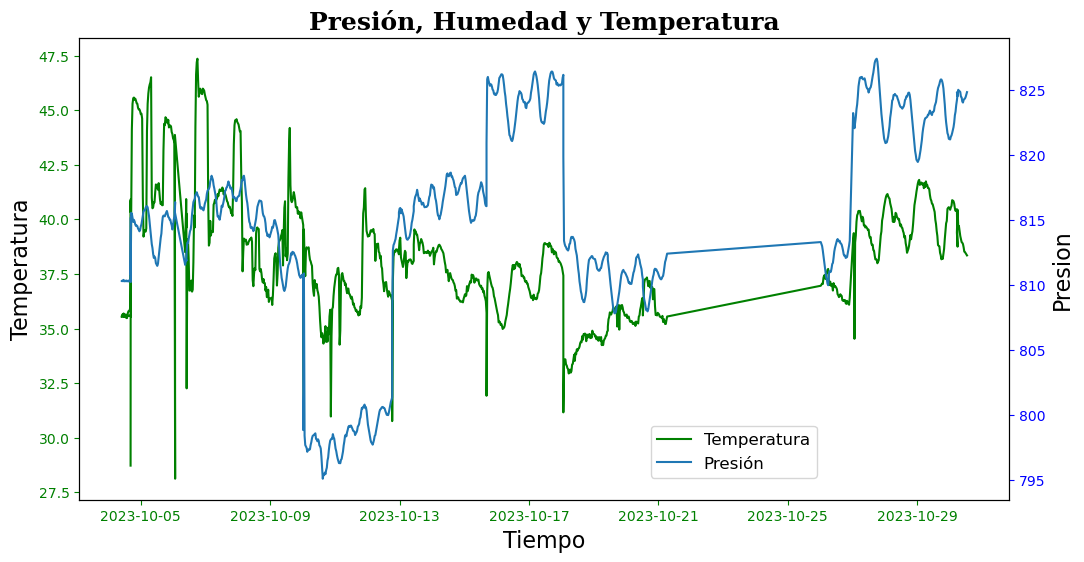

In [78]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title("Presión, Humedad y Temperatura",fontsize=18,fontweight="bold",fontfamily="serif")

ax1.set_xlabel("Tiempo",fontsize=16)
ax1.set_ylabel("Temperatura",fontsize=16)
ax1.plot(tiempo, datafull[" Temperatura"], label="Temperatura", color="g")
ax1.tick_params(colors="g")
#ax1.plot(tiempo, datafull["Humedad"],label="Humedad",color="y")
ax2=ax1.twinx()
ax2.set_ylabel("Presion",fontsize=16)
ax2.plot(tiempo, datafull["Presion"],label="Presión")
ax2.tick_params(colors="b")
fig.legend(loc = (0.6,0.15),fontsize=12)

(array([  4.,  26.,  37.,  27., 102., 129., 145., 148., 154., 153.,  65.,
         43.,   2.,   3.,   1.,   1.,   0.,   1.,   1.,   1.]),
 array([18.18 , 20.204, 22.228, 24.252, 26.276, 28.3  , 30.324, 32.348,
        34.372, 36.396, 38.42 , 40.444, 42.468, 44.492, 46.516, 48.54 ,
        50.564, 52.588, 54.612, 56.636, 58.66 ]),
 <BarContainer object of 20 artists>)

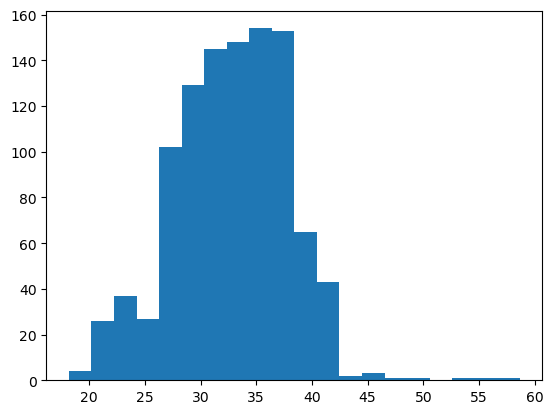

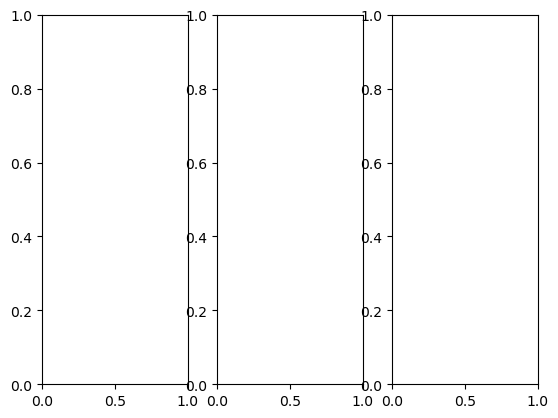

In [75]:
fig, ax = plt.subplots(1,3)
